In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np

In [4]:
img=cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg",1)
# must use jpg only and 1 for colour image

In [5]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 252]
  [248 250 251]
  [247 249 250]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 252]
  [250 252 253]
  [249 251 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [252 254 255]
  [251 253 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 253]
  [254 255 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 253]
  [254 255 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 253]
  [254 255 253]]]


In [6]:
img.shape

(900, 1600, 3)

# display the image

In [7]:
cv2.imshow('JAI BABU',img)
cv2.waitKey()
cv2.destroyAllWindows()

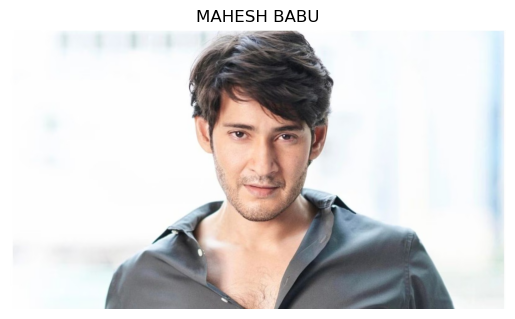

In [49]:
import cv2
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.title("MAHESH BABU")
plt.axis('off')  # Optional: hide axis
plt.show()


In [8]:
import cv2

# Read and resize the image
img = cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg")
resized_image = cv2.resize(img, (450, 800))

# Option 1: Convert to grayscale (recommended if you want B&W)
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Option 2: Just show the original resized image (no conversion)
# cv2.imshow('MAHESH BABU', resized_image)

cv2.imshow('MAHESH BABU', gray)
cv2.waitKey(5000)  # Closes after 5 seconds
cv2.destroyAllWindows()

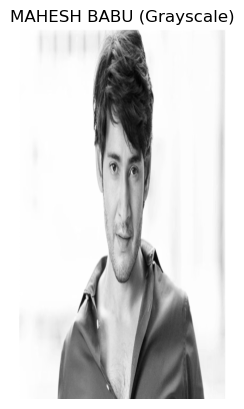

In [45]:
import cv2
from matplotlib import pyplot as plt

# Read and resize the image
img = cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg")
if img is None:
    print("Error: Could not load image!")
else:
    resized_image = cv2.resize(img, (450, 800))
    
    # Convert to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Display the image using matplotlib (inline in Jupyter/IDE)
    plt.imshow(gray, cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Hide axes
    plt.title("MAHESH BABU (Grayscale)")
    plt.show()

# face Detection using HAAR Cascade Classifier

In [9]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

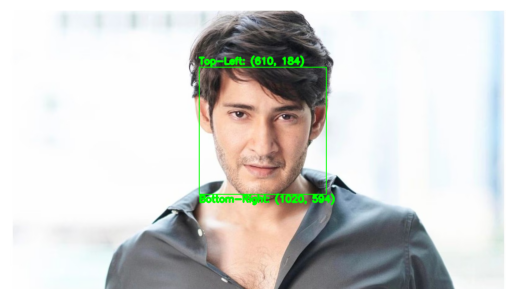

In [35]:
import cv2
import matplotlib.pyplot as plt

def detect_face_with_coordinates_on_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    
    if len(faces) == 0:
        return None  # No face detected
    
    (x, y, w, h) = faces[0]
    
    # Draw rectangle
    img_with_rect = img.copy()
    cv2.rectangle(img_with_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Add coordinates text
    top_left_text = f"Top-Left: ({x}, {y})"
    bottom_right_text = f"Bottom-Right: ({x + w}, {y + h})"
    
    # Position text above and below the rectangle
    cv2.putText(
        img_with_rect, 
        top_left_text, 
        (x, y-10),  # Above the rectangle
        cv2.FONT_HERSHEY_SIMPLEX, 
        1, 
        (0, 255, 0),  # Green text
        5
    )
    cv2.putText(
        img_with_rect, 
        bottom_right_text, 
        (x, y + h + 25),  # Below the rectangle
        cv2.FONT_HERSHEY_SIMPLEX, 
        1, 
        (0, 255, 0), 
        5
    )
    
    return img_with_rect

# Load image
img = cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg")  # Replace with your image path
if img is None:
    print("Error: Image not loaded!")
else:
    result_img = detect_face_with_coordinates_on_image(img)
    if result_img is not None:
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        cv2.imwrite('face_with_coordinates.jpg', result_img)
    else:
        print("No face detected!")

# Detection of eye and Face

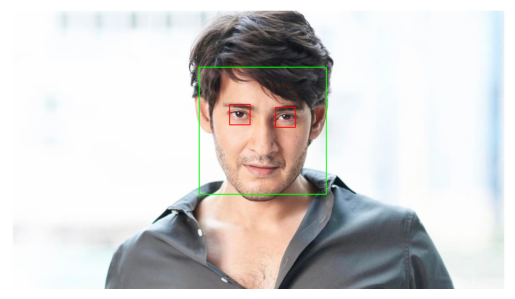

In [44]:
import cv2
import matplotlib.pyplot as plt

def detect_face_and_eyes(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load Haar Cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')  # Better for eyes
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))
    
    if len(faces) == 0:
        return None  # No face detected
    
    img_with_detections = img.copy()
    for (x, y, w, h) in faces:
        # Draw face rectangle (green)
        cv2.rectangle(img_with_detections, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Region of Interest (ROI) for eyes: Upper half of the face
        roi_gray = gray[y:y + int(h/2), x:x + w]  # Focus on top 50% of face
        roi_color = img_with_detections[y:y + int(h/2), x:x + w]
        
        # Detect eyes with stricter parameters
        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.05,  # More precise scaling
            minNeighbors=8,    # Fewer false positives
            minSize=(20, 20)   # Minimum eye size
        )
        
        # Draw eye rectangles (red)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)
    
    return img_with_detections

# Load image
img = cv2.imread(r"C:\Users\hp\Downloads\jai_babu.jpg")
if img is None:
    print("Error: Image not loaded!")
else:
    result_img = detect_face_and_eyes(img)
    if result_img is not None:
        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        cv2.imwrite('accurate_face_and_eyes.jpg', result_img)
    else:
        print("No face detected!")